In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OscFit path
sys.path.append('/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules')

In [3]:
import dataLoader, oscFit
reload(dataLoader)
import MCEqFlux

In [4]:
user = 'kpi_user_simple'
pid_array = np.array([-3, 2., np.inf])
sky_start = -1
sky_stop = 1
bins = 9

In [5]:
loader =  dataLoader.dataLoader(bin_edges   = [10**np.linspace(0.75,2.15,11),
                                               np.arccos(np.linspace(sky_start,sky_stop,bins))[::-1],
                                               pid_array],
                                    observables = ['reco_energy', 'reco_zenith', 'delta_llh'],
                                    user = user,
                                    LEaxis = [],
                                    bkg_diff_is_syst = True,
                                    #user_init = [0],
                                    expected_years = 3,
                                    weight_keys = ['weight_e', 'weight_mu'],
                                    detsys_perflavor=False, # Calculate the detector variations per flavor
                                    legacy_detsys = False, # Calcualte the detector variations as in the PRD paper
                                    detailed_detsys=False, # Re-calculate the detector variations at each minimization step
                                    verbose = False)


 ************************************ 
 **** oscFit3D v1.0 - dataLoader ****
 ************************************
dataLoader: Initializing user kpi_user_simple


/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/dataLoader.py:45: RuntimeWarning: divide by zero encountered in divide
  in_dict['LE'] = np.log10(propagationDistance(in_dict['reco_zenith'])/in_dict['reco_energy'])


dataLoader: MC loaded successfully!
dataLoader: Setting MCEq fluxes for all mc sets, including systematic variations
List of files used for atmmu_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg2.IC86_4.11082016.pckl
List of files used for atmmu_new_data estimation (with weight of 1):
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_2.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_3.11082016.pckl
 + /project/6033576/jpyanez/dragon_data/pckl_old/Level6.0000.data_bkg1.IC86_4.11082016.pckl
dataLoader: Muon background templates loaded successfully!


In [6]:
print 'DONE'

DONE


In [7]:
livetime = loader.sec2years*2.8

In [8]:
import oscFit
reload(oscFit)

<module 'oscFit' from '/home/jpyanez/projects/rpp-kenclark/jpyanez/oscfit_code/oscfit_dragon/modules/oscFit.pyc'>

In [11]:
ref = loader.loadMCasData({'norm_nu':2.9,
                          'norm_atmmu':0,
                          'oscMode':'TwoNeutrino'})
print 'Events in pseudo-data sample', np.sum(ref)

dataLoader: atmmu_norm  0 , noise_norm 1.0
Events in pseudo-data sample 42133.43411399768


In [12]:
fitter = oscFit.fitOscParams()
data_loaders    = [loader]          # Here you could list many samples to be fit at once
data_histograms = [ref]  # The data histogram for each of the samples


 ************************************ 
 ****** oscFit3D v1.0 - oscFit ******
 ************************************


In [13]:
# The settings of the fit are given as [ini_value, fix?]
fit_settings    = {
    'simulation':     'baseline',      # This patches GENIE simulation with NuGen.
    'dm31':           [0.0025, False, 'NH'], # Need to specify the hierarchy of the fit
    'theta23':        [0.76, False],         # Not used in the "TwoNeutrino" mode
    'theta13':        [0.148, True],        # Not used in the "TwoNeutrino" mode
    'mix_angle':      [0.97, False, 1.4],     # Only used in the "TwoNeutrino" mode. Leave as is otherwise.
    'oscMode':        'TwoNeutrino',         # How do you want to fit the data?
    'oscTables':      False,
    'norm':           [1.0, False],
    'norm_e':         [1., True],
    'norm_tau':       [1., True],            # Set to false for nutau apperance studies
    'nu_nubar':       [1., True],
    'nubar_ratio':     [0., True],
    'uphor_ratio':    [0., True],

    'gamma':          [0.00, False],
    # New parameters
    'w_pi':           [0.00, True],
    'w_k':            [0.02, False],
    
    
    'axm_qe':         [0., True],
    'axm_res':        [0., False],
    'pid_bias':       [0., True],
    'hole_ice':       [0.02, True],
    'hi_fwd':         [0.0, True],

    'norm_nc':        [1., False],
    'domeff':         [1., True],
    'had_escale':     [1., True],
    'atmmu_f':        [0.0, False, 'new_data'],
    'noise_f':        [0.0, True],
#    'fix_norm_region':[1.7],
    'detector_syst':  True,
    'include_priors': True,
    'printMode':      -1}                  # Do you want to see every step MINUIT takes?

In [14]:
result_NH = fitter(data_histograms=data_histograms,
                data_loaders=data_loaders,
                fit_settings=fit_settings,
                #fit_priors = fit_priors,
                ncalls = 1000,
                do_chi2_fit = True,
                store_fit_details = True)

oscFit: Fitter running in TwoNeutrino mode
oscFit: 42133.43411399768  events in data
oscFit: Fitting in normal hierarchy mode
1.70481
oscFit: Testing the LLH2 function  1.704808009484326
Baseline LLH value given in settings:  0.0
oscFit: Fit settings
	noise_f 	[0.0, True]
	pid_bias 	[0.0, True]
	deltacp 	[0.0, True]
	hi_fwd 	[0.0, True]
	printMode 	-1
	oscMode 	TwoNeutrino
	include_priors 	True
	theta24 	[0.0, True]
	atmmu_f 	[0.0, False, 'new_data']
	w_k 	[0.02, False]
	theta23 	[0.76, False]
	uphor_ratio 	[0.0, True]
	detector_syst 	True
	theta34 	[0.0, True]
	w_pi 	[0.0, True]
	norm 	[1.0, False]
	axm_res 	[0.0, False]
	norm_tau 	[1.0, True]
	oscTables 	False
	nubar_ratio 	[0.0, True]
	dm41 	[0.0, True]
	norm_nc 	[1.0, False]
	domeff 	[1.0, True]
	hole_ice 	[0.02, True]
	dm31 	[0.0025, False, 'NH']
	nu_nubar 	[1.0, True]
	baseline_llh 	[0.0, True]
	had_escale 	[1.0, True]
	dm21 	[7.53e-05, True]
	mix_angle 	[0.97, False, 1.4]
	simulation 	baseline
	norm_e 	[1.0, True]
	axm_qe 	[0.0,

0.14104  +0.00250  +0.99669  +0.99992  +0.00041  -0.01012  +0.00130  -0.02457  +1.00804
0.14129  +0.00250  +0.99669  +0.99992  +0.00041  -0.01012  +0.00130  -0.02480  +1.00804
0.14124  +0.00250  +0.99669  +0.99992  +0.00041  -0.01012  +0.00130  -0.02469  +1.00808
0.14110  +0.00250  +0.99669  +0.99992  +0.00041  -0.01012  +0.00130  -0.02469  +1.00801
0.10978  +0.00250  +0.99918  +0.99998  -0.00049  -0.02728  +0.00051  +0.01467  +1.00225
0.05596  +0.00250  +0.99807  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05601  +0.00250  +0.99807  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05592  +0.00250  +0.99807  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05596  +0.00250  +0.99808  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05597  +0.00250  +0.99806  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05596  +0.00250  +0.99807  +0.99995  -0.00009  -0.01962  +0.00082  -0.00290  +1.00484
0.05597  +0.00250  +0.99807  +0.

0.00033  +0.00250  +0.99985  +1.00000  +0.00030  -0.00110  +0.00006  +0.01129  +1.00059
0.00033  +0.00250  +0.99985  +1.00000  +0.00030  -0.00110  +0.00006  +0.01109  +1.00059
0.00033  +0.00250  +0.99985  +1.00000  +0.00030  -0.00110  +0.00006  +0.01119  +1.00062
0.00033  +0.00250  +0.99985  +1.00000  +0.00030  -0.00110  +0.00006  +0.01119  +1.00056
0.00028  +0.00250  +0.99991  +1.00000  +0.00028  -0.00093  +0.00005  +0.01097  +1.00048
0.00022  +0.00250  +1.00004  +1.00000  +0.00024  -0.00052  +0.00003  +0.01046  +1.00023
0.00022  +0.00250  +1.00006  +1.00000  +0.00024  -0.00049  +0.00003  +0.01042  +1.00020
0.00022  +0.00250  +1.00006  +1.00000  +0.00024  -0.00049  +0.00003  +0.01042  +1.00020
0.00022  +0.00250  +1.00006  +1.00000  +0.00024  -0.00049  +0.00003  +0.01042  +1.00020
0.00022  +0.00250  +1.00006  +1.00000  +0.00024  -0.00049  +0.00003  +0.01042  +1.00020
0.00022  +0.00250  +1.00005  +1.00000  +0.00024  -0.00049  +0.00003  +0.01042  +1.00020
0.00022  +0.00250  +1.00006  +1.

0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00110  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99996
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99994
0.00001  +0.00250  +0.99998  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00041  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00001  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00123  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99998
0.00001  +0.00250  +0.99998  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99998  +1.

0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00047  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00114  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00110  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99996
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99994
0.00001  +0.00250  +0.99999  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00007  -0.00045  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.00000  +0.00006  -0.00030  +0.00000  +0.00112  +0.99995
0.00001  +0.00250  +0.99997  +1.

In [15]:
print 'DONE'

DONE


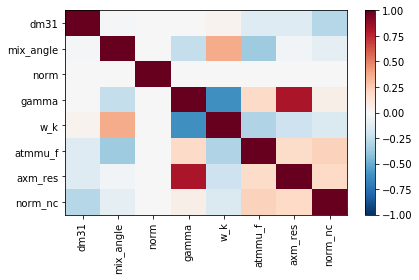

In [16]:
params = []
for param in result_NH["parameters"]:
    if not result_NH["fit_settings"][param][1]:
        params.append(param)
ticks = range(0,len(params))
fig, ax = plt.subplots()
im = ax.imshow(np.transpose(result_NH["corr_matrix"]),cmap='RdBu_r', aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_yticks(ticks)
ax.set_xticks(ticks)
ax.set_xticklabels(params)
ax.set_yticklabels(params)
plt.xticks(rotation=90)
#x0, x1, y0, y1 = plt.axis()
#plt.axis((x0+3.0,x1+3.0, y0, y1))
fig.tight_layout()